In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#check unique value in dataset
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Categoiral Features: 
    
1.Item_Identifier 

2.Item_Fat_Content

3.Item_Type 

4.Outlet_Identifier 

5.Outlet_Size  

6.Outlet_Location_Type 

7.Outlet_Type 


In [7]:
#check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# handling Missing Values:

In [8]:
# mean value of 'Item_Weight' column
df['Item_Weight'].mean()

12.857645184136183

In [9]:
#filling missing values in ['Item_Weight'] column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [10]:
df['Item_Weight'].isnull().sum()

0

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
df.Outlet_Size=df.Outlet_Size.fillna(df['Outlet_Size'].mode()[0])

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All missing values are filled

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
#combine Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [17]:
#after combining
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes:

In [18]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [19]:
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [20]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Foods','NC':'Non-Consumable','DR':'Drinks'})

In [21]:
df['New_Item_Type'].value_counts()

Foods             6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [22]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# Creating small values  for establishment year

In [23]:
df['Outlet_Year'] = 2013 - df['Outlet_Establishment_Year']

In [24]:
df['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Foods,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Foods,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Foods,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# EDA

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

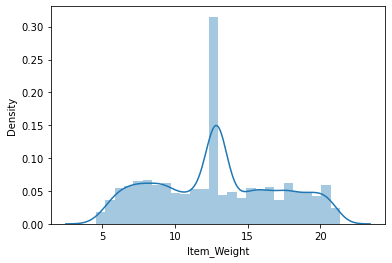

In [26]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

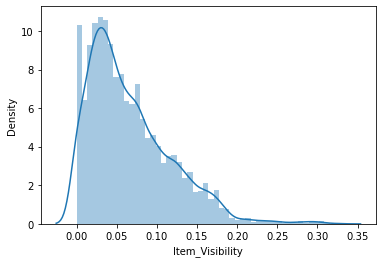

In [27]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

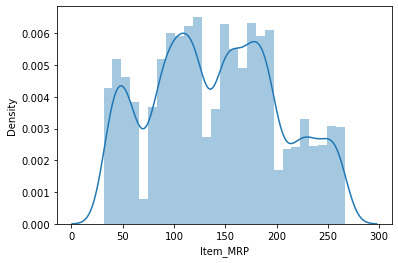

In [28]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

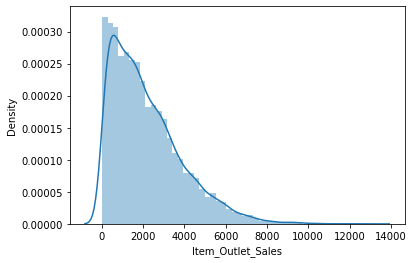

In [29]:
sns.distplot(df['Item_Outlet_Sales'])

Log Transformation for 'Item_Outlet_Sales'

In [30]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

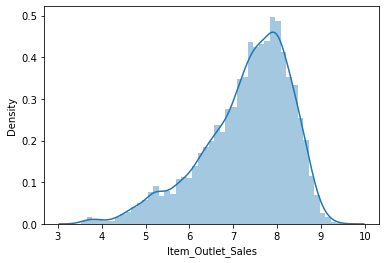

In [31]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

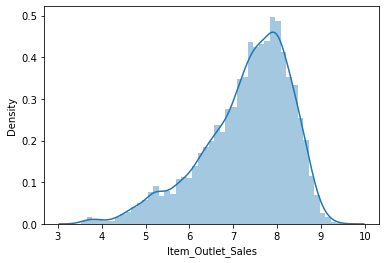

In [32]:
sns.distplot(df['Item_Outlet_Sales'])

Now for Categorial Features

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

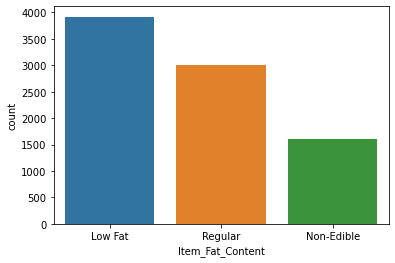

In [33]:
sns.countplot(df['Item_Fat_Content'])

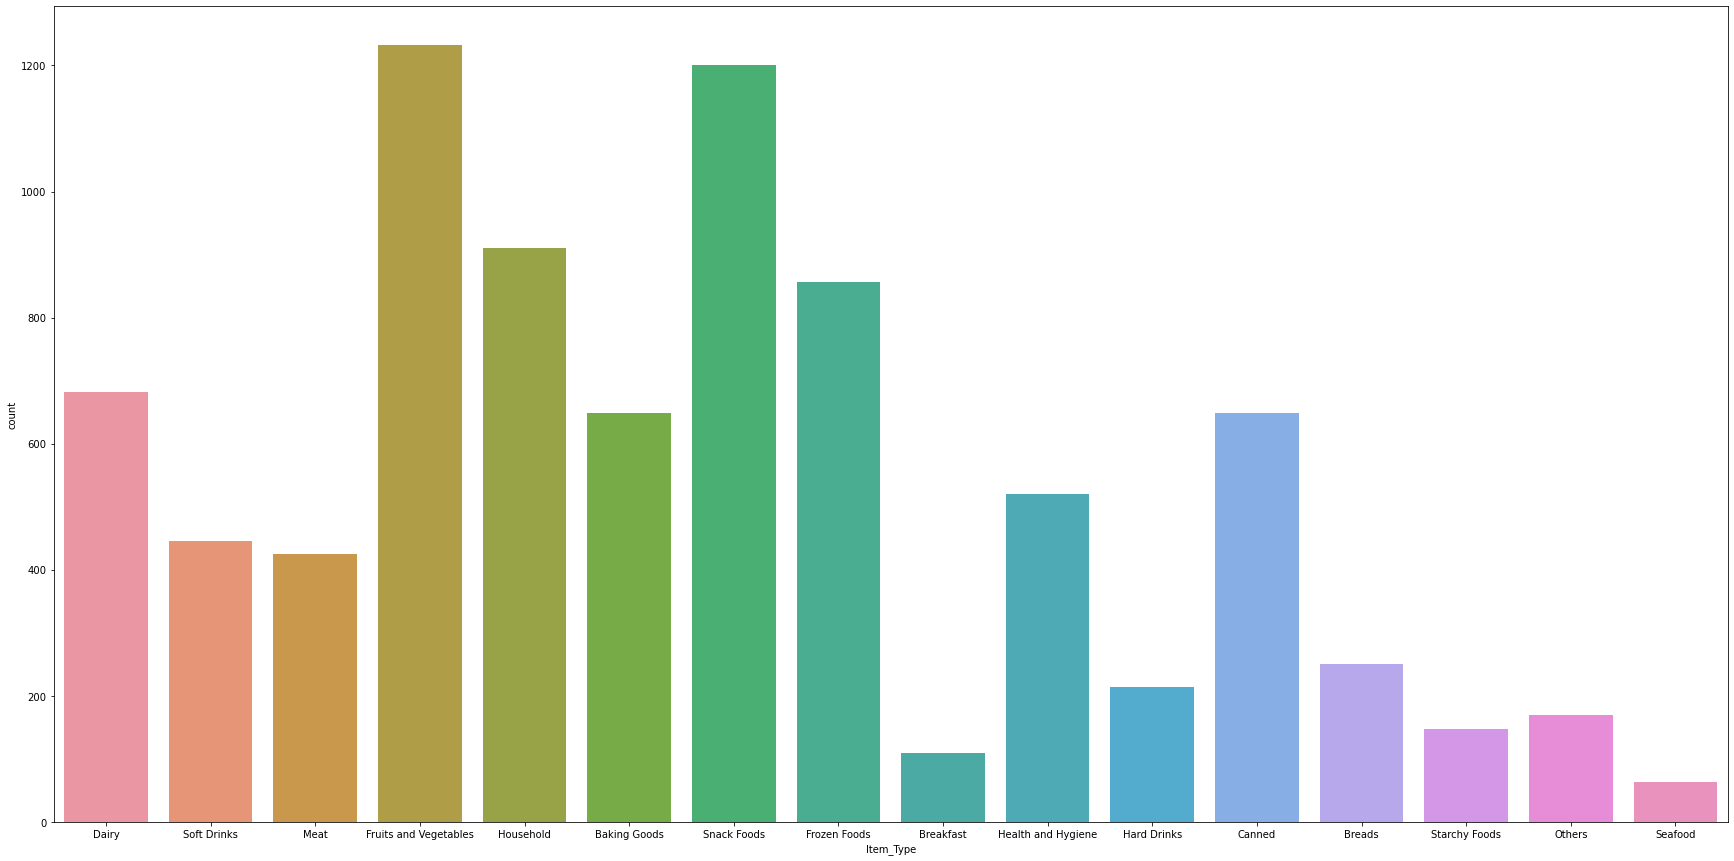

In [34]:
plt.figure(figsize=(30,15))
sns.countplot(df['Item_Type'])
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

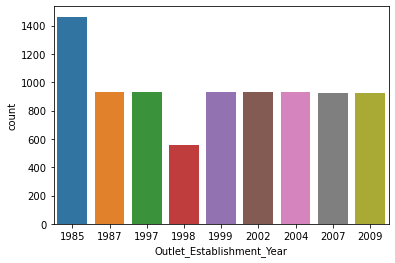

In [35]:
sns.countplot(df['Outlet_Establishment_Year'])

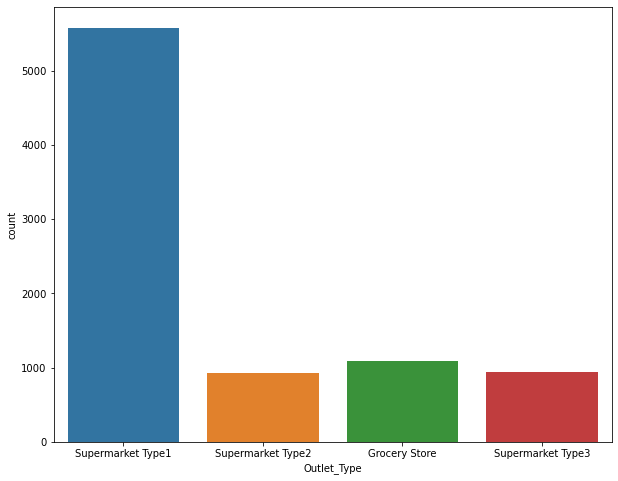

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Type'])
plt.show()

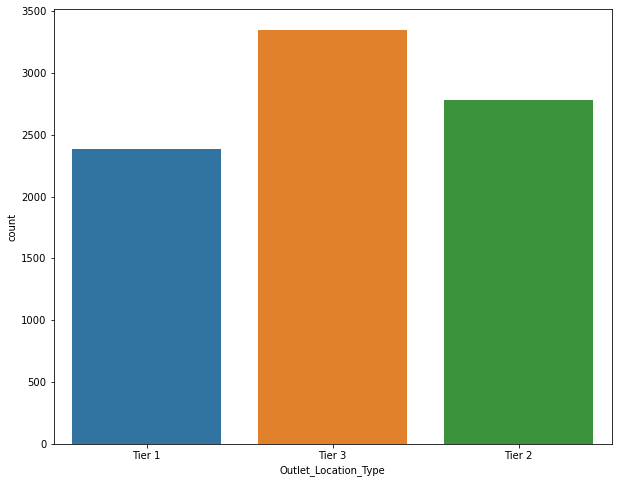

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Location_Type'])
plt.show()

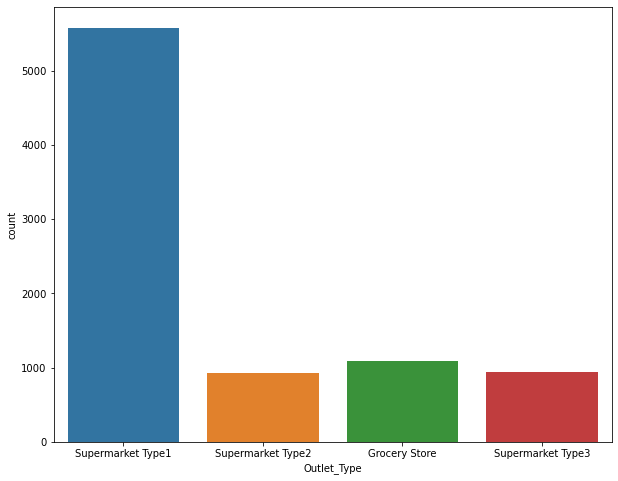

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Type'])
plt.show()

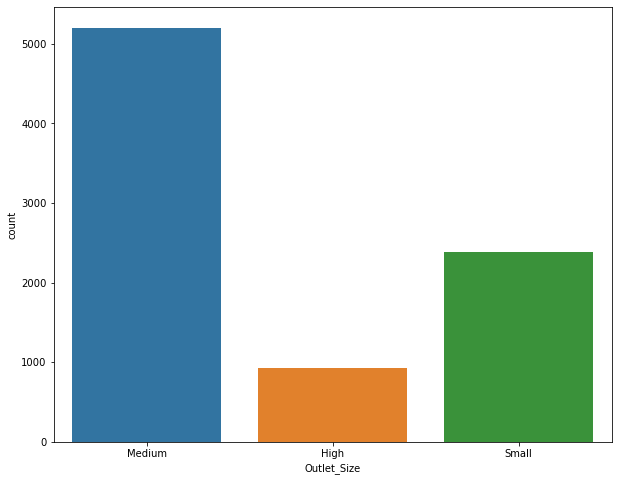

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Size'])
plt.show()

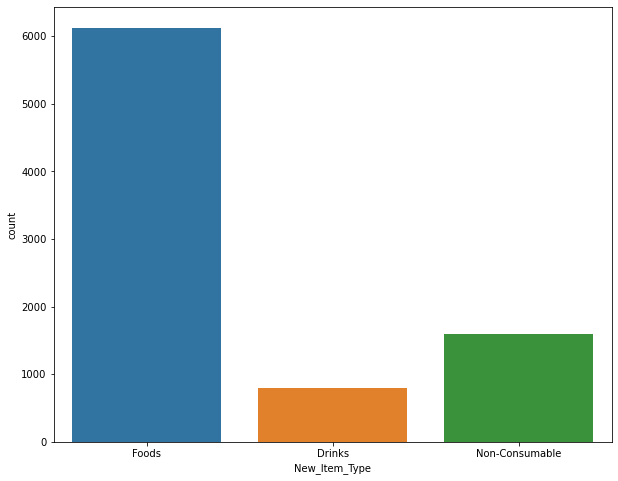

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df['New_Item_Type'])
plt.show()

# Coorelation:

In [41]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.192996,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.192996,0.509886,0.077032,1.000000,-0.077032
Outlet_Year,0.008301,0.074834,-0.005020,-1.000000,-0.077032,1.000000


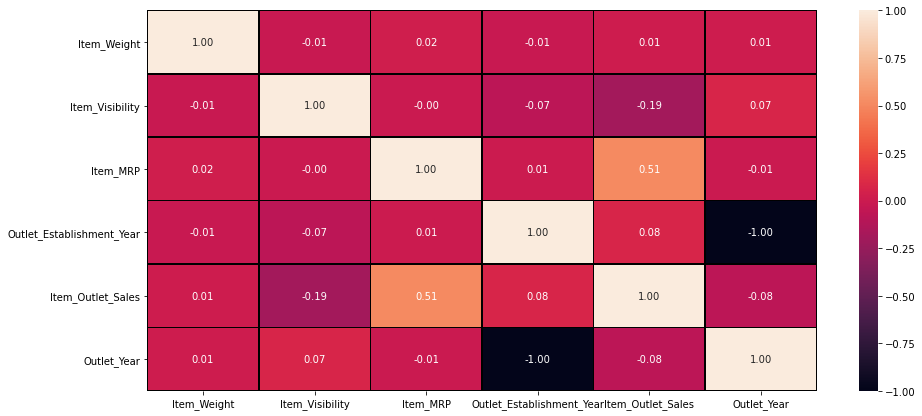

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black",fmt= '.2f')
plt.show()

# Label Encoding:

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

In [46]:
cat_col =('Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type')
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# OneHot Encoding

In [47]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,156,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.000000,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.000000,9,53.8614,OUT013,1987,6.903451,26,0,...,0,0,1,0,1,0,0,0,0,1


In [49]:
df.shape

(8523, 25)

# Input Split:

In [76]:
X = df.drop(columns=['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Model Building:

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    
    #train the model
    model.fit(X,y)

    #predict the model
    pred = model.predict(X)

    #perfrom cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("Cv_Score:", cv_score)

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

Model Report
MSE: 0.2882048300807782
Cv_Score: 0.2892520136039909


<AxesSubplot:title={'center':'Model Coefficient'}>

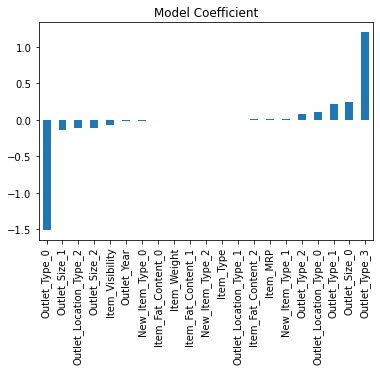

In [79]:
model = LinearRegression()
train(model, X , y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficient')

# Ridge:

Model Report
MSE: 0.4485379743525324
Cv_Score: 0.4494668445439796


<AxesSubplot:title={'center':'Model Coefficient'}>

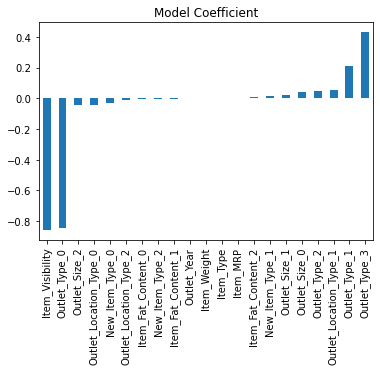

In [80]:
model = Ridge(normalize=True)
train(model, X , y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficient')

# Lasso:

Model Report
MSE: 0.7628688679102086
Cv_Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficient'}>

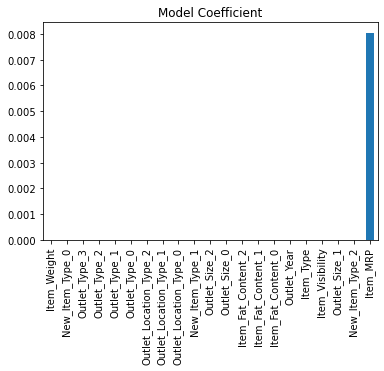

In [81]:
model = Lasso()
train(model, X , y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficient')

# DecisionTreeRegression:

In [82]:
from sklearn.tree import DecisionTreeRegressor

Model Report
MSE: 0.0
Cv_Score: 0.584988068120838


<AxesSubplot:title={'center':'Feature Importance'}>

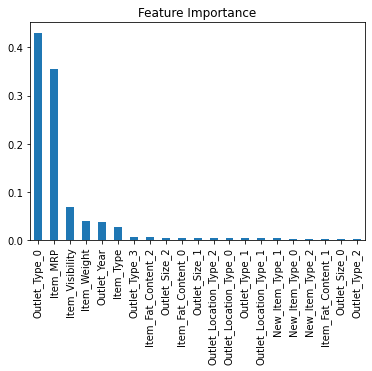

In [83]:
model = DecisionTreeRegressor()
train(model, X , y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

# RandomForestRegressor:

In [84]:
from sklearn.ensemble import RandomForestRegressor

Model Report
MSE: 0.04238540782321742
Cv_Score: 0.30967893775208616


<AxesSubplot:title={'center':'Feature Importance'}>

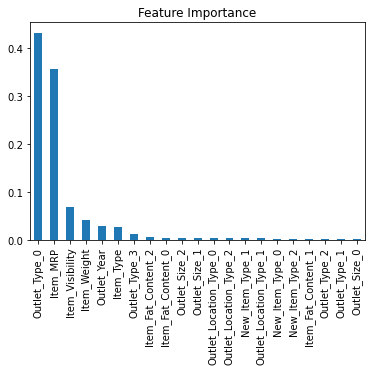

In [86]:
model = RandomForestRegressor()
train(model, X , y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

# XGBRegressor

In [92]:
from xgboost import XGBRegressor

Model Report
MSE: 0.134155964606766
Cv_Score: 0.3136183292998312


<AxesSubplot:title={'center':'Feature Importance'}>

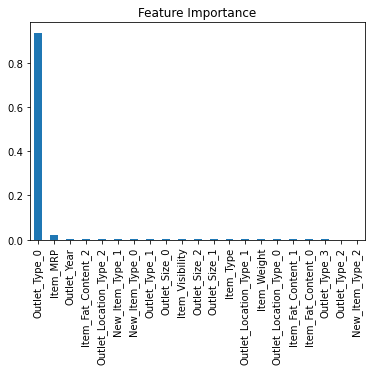

In [93]:
model = XGBRegressor()
train(model, X , y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

# HyperParameter Tuning:

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False),"positive":(False,True)}

In [96]:
# create and fit a ridge regression model, testing each alpha
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
parameters=dict(alpha=alphas)

In [101]:
gcv=GridSearchCV(Lasso(), parameters,cv=5)

In [104]:
gcv.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [106]:
gcv.best_params_
print(gcv.best_score_)

0.7188676487231832


# Saving the model

In [125]:
import joblib
joblib.dump(mod,"Bigdata Mart.pkl")

['Bigdata Mart.pkl']